## 심슨 캐릭터 분류

In [24]:
# 테스트 폴더에 category 없이 이미지만 존재하여 카케고리 폴더를 생성 후 해당 이름에 맞게 copy
import os
import shutil
from glob import glob

# 원본 이미지가 있는 폴더
test_folder_root = "./datasets/homer_simpsons/test_original/"
test_folder_new_root = "./datasets/homer_simpsons/test/"

# 파일 목록을 가져오기 (하위 디렉토리를 포함한 모든 이미지 파일을 가져옵니다.)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(test_folder_root, ext)))

# 이미지 파일을 상위 폴더 이름에 맞게 이동
for file_path in image_files:
    # 파일 이름 추출
    file_name = os.path.basename(file_path)
    
    # 파일 이름에서 폴더 이름 추출 (예: 'charles_montgomery_burns_46.jpg'에서 'charles_montgomery_burns' 추출)
    folder_name = file_name.rsplit('_', 1)[0]
    
    # 새 디렉토리 경로 설정
    new_folder_path = os.path.join(test_folder_new_root, folder_name)
    # print(new_folder_path)
    
    # 새 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    
    # 파일을 새 디렉토리로 복사
    new_file_path = os.path.join(new_folder_path, file_name)
    shutil.copy2(file_path, new_file_path)

print("이미지 파일 이동 완료")


./datasets/homer_simpsons/test/principal_skinner
./datasets/homer_simpsons/test/apu_nahasapeemapetilon
./datasets/homer_simpsons/test/abraham_grampa_simpson
./datasets/homer_simpsons/test/principal_skinner
./datasets/homer_simpsons/test/apu_nahasapeemapetilon
./datasets/homer_simpsons/test/sideshow_bob
./datasets/homer_simpsons/test/mayor_quimby
./datasets/homer_simpsons/test/mayor_quimby
./datasets/homer_simpsons/test/sideshow_bob
./datasets/homer_simpsons/test/ned_flanders
./datasets/homer_simpsons/test/comic_book_guy
./datasets/homer_simpsons/test/kent_brockman
./datasets/homer_simpsons/test/abraham_grampa_simpson
./datasets/homer_simpsons/test/ned_flanders
./datasets/homer_simpsons/test/homer_simpson
./datasets/homer_simpsons/test/chief_wiggum
./datasets/homer_simpsons/test/nelson_muntz
./datasets/homer_simpsons/test/nelson_muntz
./datasets/homer_simpsons/test/edna_krabappel
./datasets/homer_simpsons/test/charles_montgomery_burns
./datasets/homer_simpsons/test/edna_krabappel
./data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/homer_simpsons/original/'

image_data_generator = ImageDataGenerator(rescale =1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size = (250, 250),
    batch_size=32,
    class_mode='categorical'
)

print(generator.class_indices)

Found 41866 images belonging to 43 classes.
{'abraham_grampa_simpson': 0, 'agnes_skinner': 1, 'apu_nahasapeemapetilon': 2, 'barney_gumble': 3, 'bart_simpson': 4, 'carl_carlson': 5, 'charles_montgomery_burns': 6, 'chief_wiggum': 7, 'cletus_spuckler': 8, 'comic_book_guy': 9, 'disco_stu': 10, 'edna_krabappel': 11, 'fat_tony': 12, 'gil': 13, 'groundskeeper_willie': 14, 'homer_simpson': 15, 'kent_brockman': 16, 'krusty_the_clown': 17, 'lenny_leonard': 18, 'lionel_hutz': 19, 'lisa_simpson': 20, 'maggie_simpson': 21, 'marge_simpson': 22, 'martin_prince': 23, 'mayor_quimby': 24, 'milhouse_van_houten': 25, 'miss_hoover': 26, 'moe_szyslak': 27, 'ned_flanders': 28, 'nelson_muntz': 29, 'otto_mann': 30, 'patty_bouvier': 31, 'principal_skinner': 32, 'professor_john_frink': 33, 'rainier_wolfcastle': 34, 'ralph_wiggum': 35, 'selma_bouvier': 36, 'sideshow_bob': 37, 'sideshow_mel': 38, 'simpsons_dataset': 39, 'snake_jailbird': 40, 'troy_mcclure': 41, 'waylon_smithers': 42}


In [4]:
# pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 7.1 MB/s eta 0:00:0000:0100:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


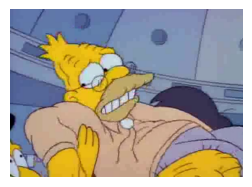

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[0]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [12]:
import pandas as pd

s_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
# s_df.loc[:, 'file_paths'] = x_df.file_paths.apply(lambda x: x.replace('\\', '/'))
# s_df.file_paths.iloc[:1]

original_max_colwidth = pd.get_option('display.max_colwidth')

# 생략 없이 전체 경로가 출력되도록 설정
pd.set_option('display.max_colwidth', None)

# DataFrame 출력
print(s_df.file_paths.iloc[:1])

# 원래 설정 값으로 복원
pd.set_option('display.max_colwidth', original_max_colwidth)

s_df


0    ./datasets/homer_simpsons/original/abraham_grampa_simpson/pic_0000.jpg
Name: file_paths, dtype: object


,file_paths,targets
0,./datasets/homer_simpsons/original/abraham_gra...,0
1,./datasets/homer_simpsons/original/abraham_gra...,0
2,./datasets/homer_simpsons/original/abraham_gra...,0
3,./datasets/homer_simpsons/original/abraham_gra...,0
4,./datasets/homer_simpsons/original/abraham_gra...,0
...,...,...
41861,./datasets/homer_simpsons/original/waylon_smit...,42
41862,./datasets/homer_simpsons/original/waylon_smit...,42
41863,./datasets/homer_simpsons/original/waylon_smit...,42
41864,./datasets/homer_simpsons/original/waylon_smit...,42


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(s_df.file_paths, s_df.targets, stratify=s_df.targets, test_size=0.2, random_state=124)

print(X_train.count())
print(X_val.count())

33492
8374


In [15]:
import shutil
import os

root = './datasets/homer_simpsons/'

for file_path in X_train:
    simpson_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + simpson_dir)
    # print(destination)
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [16]:
import shutil
import os

root = './datasets/homer_simpsons/'

for file_path in X_val:
    simpson_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + simpson_dir)
    
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 250

train_dir = './datasets/homer_simpsons/train'
validation_dir = './datasets/homer_simpsons/validation'
test_dir = './datasets/homer_simpsons/test'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 33492 images belonging to 43 classes.
Found 8374 images belonging to 43 classes.
Found 990 images belonging to 20 classes.
{'abraham_grampa_simpson': 0, 'agnes_skinner': 1, 'apu_nahasapeemapetilon': 2, 'barney_gumble': 3, 'bart_simpson': 4, 'carl_carlson': 5, 'charles_montgomery_burns': 6, 'chief_wiggum': 7, 'cletus_spuckler': 8, 'comic_book_guy': 9, 'disco_stu': 10, 'edna_krabappel': 11, 'fat_tony': 12, 'gil': 13, 'groundskeeper_willie': 14, 'homer_simpson': 15, 'kent_brockman': 16, 'krusty_the_clown': 17, 'lenny_leonard': 18, 'lionel_hutz': 19, 'lisa_simpson': 20, 'maggie_simpson': 21, 'marge_simpson': 22, 'martin_prince': 23, 'mayor_quimby': 24, 'milhouse_van_houten': 25, 'miss_hoover': 26, 'moe_szyslak': 27, 'ned_flanders': 28, 'nelson_muntz': 29, 'otto_mann': 30, 'patty_bouvier': 31, 'principal_skinner': 32, 'professor_john_frink': 33, 'rainier_wolfcastle': 34, 'ralph_wiggum': 35, 'selma_bouvier': 36, 'sideshow_bob': 37, 'sideshow_mel': 38, 'simpsons_dataset': 39, 'snake_jai

In [42]:
num_classes = train_generator.class_indices
print(len(num_classes))


43


In [64]:
num_classes = test_generator.class_indices
print(len(num_classes))


20


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 250

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(43, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 125, 125, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 63, 63, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 63, 63, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 63, 63, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 63, 63, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 43)             │         4,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,747 (2.10 MB)

 Trainable params: 549,595 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [58]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [60]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=14,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.4992 - loss: 2.1098

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1472s 1s/step - acc: 0.4992 - loss: 2.1097 - val_acc: 0.4883 - val_loss: 1.9460 - learning_rate: 0.0010
Epoch 2/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1537s 1s/step - acc: 0.4954 - loss: 1.7752 - val_acc: 0.4857 - val_loss: 1.7596 - learning_rate: 0.0010
Epoch 3/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1583s 2s/step - acc: 0.4908 - loss: 1.5947 - val_acc: 0.4879 - val_loss: 1.7198 - learning_rate: 0.0010
Epoch 4/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1544s 1s/step - acc: 0.4926 - loss: 1.4487 - val_acc: 0.4773 - val_loss: 1.5380 - learning_rate: 0.0010
Epoch 5/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1478s 1s/step - acc: 0.4927 - loss: 1.3492 - val_acc: 0.4756 - val_loss: 1.5225 - learning_rate: 0.0010
Epoch 6/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1466s 1s/step - acc: 0.4957 - loss: 1.2709 - val_acc: 0.4813 - val_loss: 1.4661 - learning_rate: 0.0010
Epoch 7/14
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1488s 1s/step - acc: 0.4939 - loss: 1.2058 - val_acc: 0.4775 - val_loss: 1.3851 - learning_ra

In [62]:
model.evaluate(test_generator, batch_size=32)

2024-05-30 10:01:01.825180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: logits and labels must be broadcastable: logits_size=[32,43] labels_size=[32,20]
	 [[{{node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_21695/786454038.py", line 1, in <module>

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 425, in evaluate

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 161, in one_step_on_iterator

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 150, in one_step_on_data

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 81, in test_step

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 316, in compute_loss

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 22, in call

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 1576, in categorical_crossentropy

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py", line 1482, in categorical_crossentropy

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 564, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,43] labels_size=[32,20]
	 [[{{node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_one_step_on_iterator_226504]

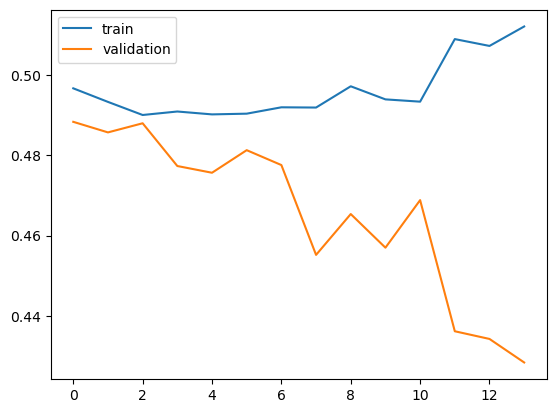

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()